In [1]:
import pandas as pd

dfCases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
dfTrack = pd.read_csv("https://api.vitaldb.net/trks")  # track list
dflabs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import minkowski
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


Q1)Please evaluate confusion matrix for your classification problem. From confusion matrix, the other performance metrics such as precision, recall and F1-Score measures for both training and test data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [3]:
def a1():
    # Create a new column 'op_duration' which is the difference between 'opend' and 'opstart'
    dfCases["op_duration"] = dfCases["opend"] - dfCases["opstart"]
    # Set the threshold for classifying surgery duration (in seconds)
    threshold_minutes = 240 * 60  # 240 minutes converted to seconds
    # Create a new column 'surgery_duration_class' which is 'long' if 'op_duration' is greater than 'threshold_minutes', else 'short'
    dfCases['surgery_duration_class'] = dfCases['op_duration'].apply(lambda x: 'long' if x > threshold_minutes else 'short')
    # Select features for training (opstart, opend, op_duration)
    X = dfCases[['opstart', 'opend', 'op_duration']]
    # Select the target variable (surgery duration class)
    y = dfCases['surgery_duration_class']
    # Split the data into training and testing sets (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # Create a KNeighborsClassifier object with 3 neighbors
    neigh = KNeighborsClassifier(n_neighbors=3)
    # Fit the classifier to the training data
    neigh.fit(X_train, y_train)
    # Predict the classes for the training set
    y_train_pred = neigh.predict(X_train)
    # Predict the classes for the testing set
    y_test_pred = neigh.predict(X_test)
    # Calculate the confusion matrix for the training set
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    # Calculate the confusion matrix for the testing set
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    # Calculate precision, recall, and F1 score for the training set
    precision_train = precision_score(y_train, y_train_pred, pos_label='long')
    recall_train = recall_score(y_train, y_train_pred, pos_label='long')
    f1_train = f1_score(y_train, y_train_pred, pos_label='long')
    # Calculate precision, recall, and F1 score for the testing set
    precision_test = precision_score(y_test, y_test_pred, pos_label='long')
    recall_test = recall_score(y_test, y_test_pred, pos_label='long')
    f1_test = f1_score(y_test, y_test_pred, pos_label='long')
    # Return the confusion matrices and performance metrics for both training and testing sets
    return conf_matrix_train, conf_matrix_test, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test

Calculate MSE, RMSE, MAPE and R2 scores for the price prediction exercise done in Lab 02. Analyse the results

In [4]:
def convert(Volume):
    # Check if the input string contains 'M' indicating millions
    if 'M' in Volume:
        # Convert the string to a float after removing 'M' and multiply by 1,000,000
        return float(Volume.replace('M', '')) * 1000000
    # Check if the input string contains 'K' indicating thousands
    elif 'K' in Volume:
        # Convert the string to a float after removing 'K' and multiply by 1,000
        return float(Volume.replace('K', '')) * 1000

In [19]:
def a2():
    # Specify the filename of the Excel file containing the data
    file = "Lab Session Data.xlsx"
    # Read the second sheet of the Excel file into a DataFrame
    dfA2 = pd.read_excel(file, sheet_name=1)
    # Drop rows with any missing values
    dfA2.dropna(inplace=True)  # Ensure to use inplace=True to modify the DataFrame directly
    # Convert the 'Date' column to datetime format
    dfA2["Date"] = pd.to_datetime(dfA2["Date"])
    # Set the 'Date' column as the index of the DataFrame
    dfA2.set_index('Date', inplace=True)
    # Convert the 'Volume' column using the previously defined 'convert' function
    dfA2['Volume'] = dfA2['Volume'].apply(convert)
    # Select features (X) and target variable (y) for the model
    X = dfA2[['Open', 'High', 'Low', 'Volume']]
    y = dfA2['Price']
    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Initialize the Random Forest Regressor model with 100 trees
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    # Fit the model to the training data
    model.fit(X_train, y_train)
    # Predict the price using the model on the test data
    y_pred = model.predict(X_test)
    # Calculate the mean squared error (MSE) between actual and predicted values
    mse = mean_squared_error(y_test, y_pred)
    # Calculate the root mean squared error (RMSE) from the MSE
    rmse = np.sqrt(mse)
    # Calculate the mean absolute percentage error (MAPE)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    # Calculate the R-squared (R2) score to evaluate model performance
    r2 = r2_score(y_test, y_pred)
    # Return the calculated metrics
    return mse, rmse, mape, r2

Generate 20 data points (training set data) consisting of 2 features (X & Y) whose values vary randomly between 1 & 10. Based on the values, assign these 20 points to 2 different classes (class0 -Blue & class1 – Red). Make a scatter plot of the training data and color the points as per their class color. Observe the plot.

In [7]:
def a3():
    # Set the random seed for reproducibility
    np.random.seed(290)
    # Generate 20 random values for X uniformly distributed between 1 and 10
    X = np.random.uniform(1, 10, 20)
    # Generate 20 random values for Y uniformly distributed between 1 and 10
    Y = np.random.uniform(1, 10, 20)
    # Create classes based on the condition: if X + Y > 10, assign class 1, else class 0
    classes = np.where(X + Y > 10, 1, 0)
    # Assign colors based on class: red for class 1, blue for class 0
    colors = np.where(classes == 1, 'red', 'blue')
    # Create a scatter plot of the generated data points
    plt.scatter(X, Y, c=colors, s=100, edgecolors='black')
    # Label the x-axis
    plt.xlabel('X')
    # Label the y-axis
    plt.ylabel('Y')
    # Set the title of the plot
    plt.title('Scatter Plot of Training Data')
    # Display the plot
    plt.show()
    # Create a DataFrame to hold the training data
    train_data = pd.DataFrame({'X': X, 'Y': Y})
    # Add the class labels to the DataFrame
    train_data['Class'] = classes
    # Return the DataFrame containing the training data
    return train_data

Generate test set data with values of X & Y varying between 0 and 10 with increments of 0.1. This creates a test set of about 10,000 points. Classify these points with above training data using kNN classifier (k = 3). Make a scatter plot of the test data output with test points colored as per their predicted class colors (all points predicted class0 are labeled blue color). Observe the color spread and class boundary lines in the feature space.

[ ]


In [8]:
def knn_classifier(train_data, k):
    # Create a grid of points for testing the classifier
    x = np.arange(0, 10.1, 0.1)  # X values from 0 to 10 (inclusive) with a step of 0.1
    y = np.arange(0, 10.1, 0.1)  # Y values from 0 to 10 (inclusive) with a step of 0.1
    # Generate a mesh grid for the test data
    X_test, Y_test = np.meshgrid(x, y)
    # Flatten the mesh grid arrays to create a DataFrame for test points
    X_t_flat = X_test.flatten()
    Y_t_flat = Y_test.flatten()
    # Create a DataFrame containing the test data points
    test_data = pd.DataFrame({'X': X_t_flat, 'Y': Y_t_flat})
    # Initialize the k-NN classifier with the specified number of neighbors (k)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the k-NN model using the training data
    knn.fit(train_data[['X', 'Y']], train_data['Class'])
    # Convert the test data DataFrame to a NumPy array for prediction
    test_data_np = np.array(test_data)
    # Predict the class labels for the test data points
    y_test_pred = knn.predict(test_data_np)
    # Add the predicted class labels to the test data DataFrame
    test_data['Prediction'] = y_test_pred
    # Assign colors based on the predicted class: red for class 1, blue for class 0
    test_data['Color'] = np.where(test_data['Prediction'] == 1, 'red', 'blue')
    # Create a scatter plot to visualize the predictions
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(test_data['X'], test_data['Y'], c=test_data['Prediction'], cmap='bwr', s=1)
    # Set the title of the plot to include the value of k
    plt.title(f'kNN Classifier Predictions for k = {k}')
    # Label the x-axis
    plt.xlabel('X')
    # Label the y-axis
    plt.ylabel('Y')
    # Add a color bar to indicate class labels
    plt.colorbar(scatter, label='Class')
    # Display the plot
    plt.show()

Repeat A4 exercise for various values of k and observe the change in the class boundary lines.

In [9]:
def a5(train_data):
    # Iterate over a range of k values from 1 to 10
    for i in range(1, 11):
        # Call the knn_classifier function with the training data and the current k value
        knn_classifier(train_data, i)

Repeat the exercises A3 to A5 for your project data considering any two features and classes.

In [10]:
def a6():
    # Select 200 random samples with 'height' and 'weight' features from dfCases DataFrame
    selected_features = dfCases[['height', 'weight']].dropna().sample(200, random_state=42)
    # Extract the 'height' and 'weight' features from the selected samples
    X_train = selected_features['height'].values
    Y_train = selected_features['weight'].values
    # Set the threshold for class assignment
    threshold = 230
    # Assign classes based on the condition: if height + weight > threshold, assign class 1, else class 0
    classes = np.where(X_train + Y_train > threshold, 1, 0)
    # Assign colors based on class: red for class 1, blue for class 0
    colors = np.where(classes == 1, 'red', 'blue')
    # Create a scatter plot of the training data
    plt.scatter(X_train, Y_train, c=colors, s=100, edgecolors='black')
    # Label the x-axis
    plt.xlabel('height')
    # Label the y-axis
    plt.ylabel('weight')
    # Set the title of the plot
    plt.title('Scatter Plot of Training Data a6')
    # Display the plot
    plt.show()
    # Return the selected features and their corresponding classes
    return selected_features, classes

In [11]:
def prereq():
    # Generate 50 evenly spaced values for height between the minimum and maximum heights in dfCases
    x_test = np.linspace(dfCases['height'].min(), dfCases['height'].max(), 50)
    # Generate 50 evenly spaced values for weight between the minimum and maximum weights in dfCases
    y_test = np.linspace(dfCases['weight'].min(), dfCases['weight'].max(), 50)
    # Create a mesh grid from the height and weight values
    X_test, Y_test = np.meshgrid(x_test, y_test)
    # Flatten the mesh grid arrays to create a DataFrame for test points
    X_t_flat = X_test.flatten()
    Y_t_flat = Y_test.flatten()
    # Create a DataFrame containing the test data points
    test_data = pd.DataFrame({'height': X_t_flat, 'weight': Y_t_flat})
    # Return the test data DataFrame and the flattened height and weight arrays
    return test_data, X_t_flat, Y_t_flat

In [12]:
def knn_classifierA6(train_data, k):
    # Call a6 function to get selected features and their classes
    selected_features, classes = a6()
    # Call prereq function to get the test data for predictions
    test_data, X_t_flat, Y_t_flat = prereq()
    # Initialize the k-NN classifier with the specified number of neighbors (k)
    knn_proj_data = KNeighborsClassifier(n_neighbors=k)
    # Fit the k-NN model using the training data and their corresponding classes
    knn_proj_data.fit(train_data[['height', 'weight']], classes)
    # Predict the class labels for the test data points
    y_test_pred = knn_proj_data.predict(test_data)
    # Add the predicted class labels to the test data DataFrame
    test_data['Prediction'] = y_test_pred
    # Assign colors based on the predicted class: red for class 1, blue for class 0
    test_data['Color'] = np.where(test_data['Prediction'] == 1, 'red', 'blue')
    # Create a scatter plot to visualize the predictions
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(test_data['height'], test_data['weight'], c=test_data['Prediction'], cmap='bwr', s=1)
    # Set the title of the plot to include the value of k
    plt.title(f'kNN Classifier Predictions for k = {k}')
    # Label the x-axis
    plt.xlabel('height')
    # Label the y-axis
    plt.ylabel('weight')
    # Add a color bar to indicate class labels
    plt.colorbar(scatter, label='Class')
    # Display the plot
    plt.show()

In [13]:
def a6f():
    # Select 200 random samples with 'height' and 'weight' features from dfCases DataFrame
    selected_features = dfCases[['height', 'weight']].dropna().sample(200, random_state=42)
    # Iterate over a range of k values from 1 to 10
    for i in range(1, 11):
        # Call the knn_classifierA6 function with the training data and the current k value
        knn_classifierA6(selected_features, i)

Use RandomSearchCV() or GridSearchCV() operations to find the ideal ‘k’ value for your kNN classifier. This is called hyper-parameter tuning

In [14]:
def a7RandomSearchCV():
    # Call the a6 function to get the selected features and their corresponding classes
    selected_features, classes = a6()
    # Define the parameter distribution for RandomizedSearchCV
    param_dist = {
        'n_neighbors': randint(1, 21),  # Random integer between 1 and 20 (inclusive)
        'weights': ['uniform', 'distance'],  # Choose either 'uniform' or 'distance'
        'p': [1, 2]  # Choose either 1 or 2 (for Manhattan or Euclidean distance)
    }
    # Initialize the k-NN classifier
    knnRSCV = KNeighborsClassifier()
    # Create the RandomizedSearchCV object
    random_search = RandomizedSearchCV(
        estimator=knnRSCV,  # The base estimator to optimize
        param_distributions=param_dist,  # The parameter distributions to sample from
        n_iter=10,  # Number of parameter settings that are sampled
        cv=5,  # Number of cross-validation folds
        scoring='accuracy',  # The scoring metric to use
        random_state=42  # Random state for reproducibility
    )
    # Fit the RandomizedSearchCV object to the selected features and classes
    random_search.fit(selected_features[['height', 'weight']], classes)
    # Print the best parameters found by the RandomizedSearchCV
    print("Best parameters found: ", random_search.best_params_)
    # Print the best cross-validation score
    print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

In [15]:
def a7grid_search():
    # Call the a6 function to get the selected features and their corresponding classes
    selected_features, classes = a6()
    # Define the parameter grid for GridSearchCV
    param_grid = {
        'n_neighbors': list(range(1, 21)),  # List of neighbors from 1 to 20
        'weights': ['uniform', 'distance'],  # Options for weight function
        'p': [1, 2]  # Options for distance metric (1 for Manhattan, 2 for Euclidean)
    }

    # Initialize the k-NN classifier
    knnGSCV = KNeighborsClassifier()
    # Create the GridSearchCV object
    grid_search = GridSearchCV(
        estimator=knnGSCV,  # The base estimator to optimize
        param_grid=param_grid,  # The parameter grid to search
        cv=5,  # Number of cross-validation folds
        scoring='accuracy'  # The scoring metric to use
    )
    # Fit the GridSearchCV object to the selected features and classes
    grid_search.fit(selected_features[['height', 'weight']], classes)
    # Print the best parameters found by the GridSearchCV
    print("Best parameters found: ", grid_search.best_params_)
    # Print the best cross-validation score
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Confusion Matrix (Training):
 [[ 640    1]
 [   1 3829]]
Confusion Matrix (Testing):
 [[ 263    3]
 [   0 1651]]
Precision (Training): 0.9984399375975039
Recall (Training): 0.9984399375975039
F1 Score (Training): 0.9984399375975039
Precision (Testing): 1.0
Recall (Testing): 0.9887218045112782
F1 Score (Testing): 0.9943289224952742
Mean Squared Error: 809.4623103649865
Root Mean Squared Error: 28.451051129351733
Mean Absolute Percentage Error: 0.01035704837454903
R2 Score: 0.9879339446644937


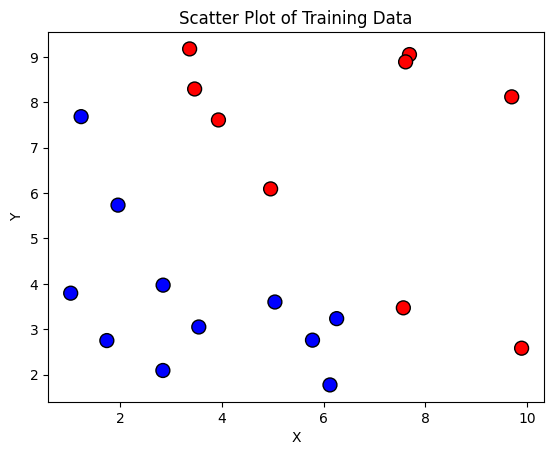

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


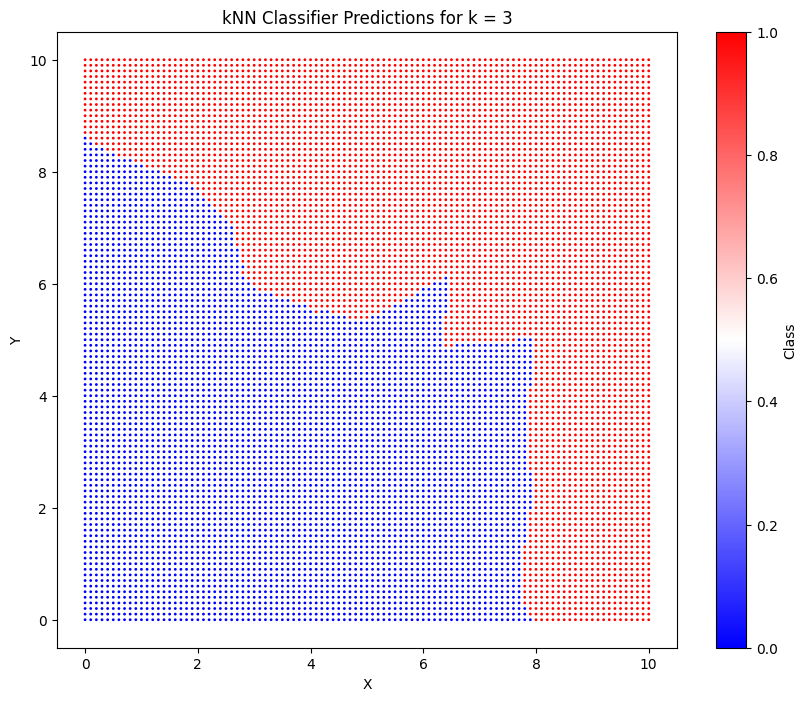

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


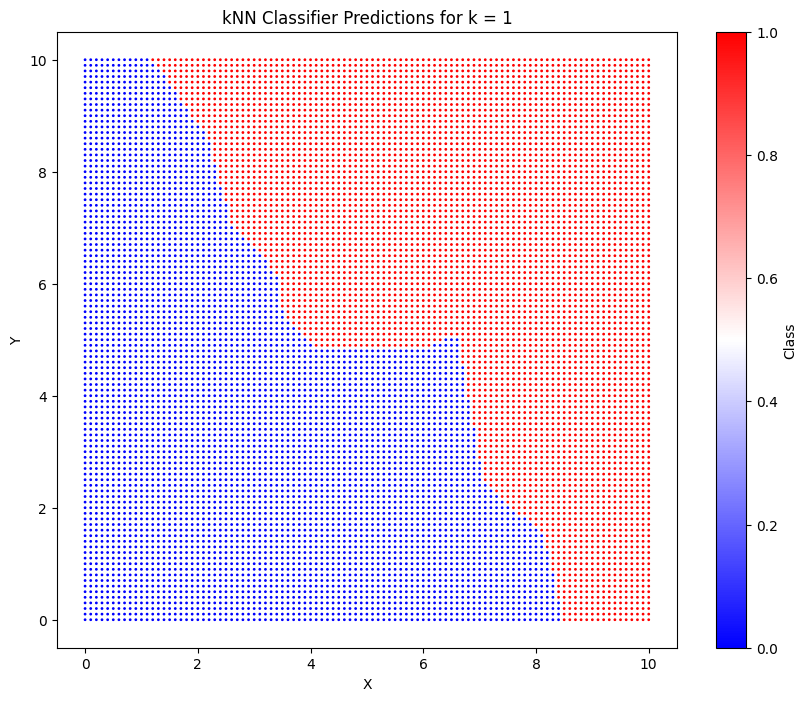

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


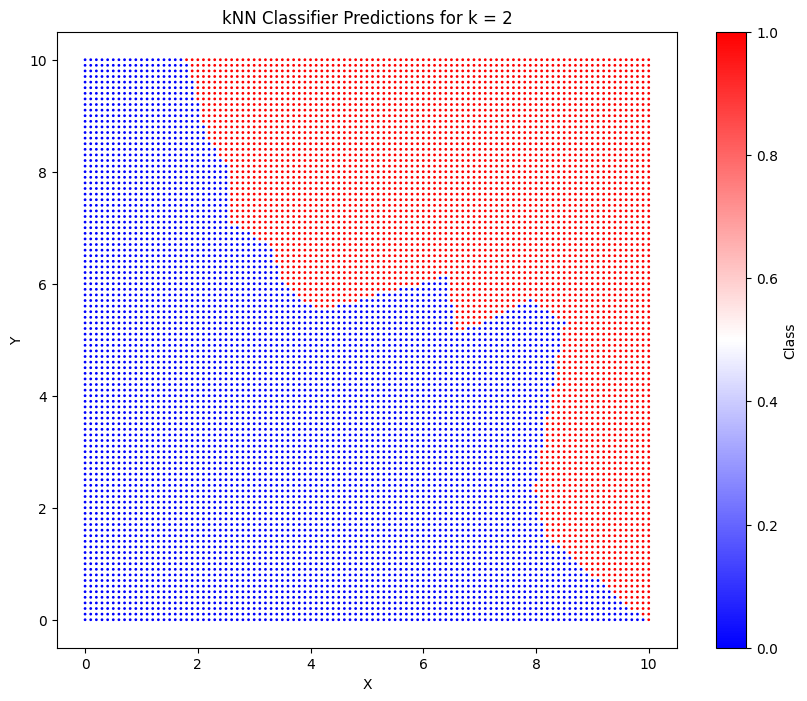

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


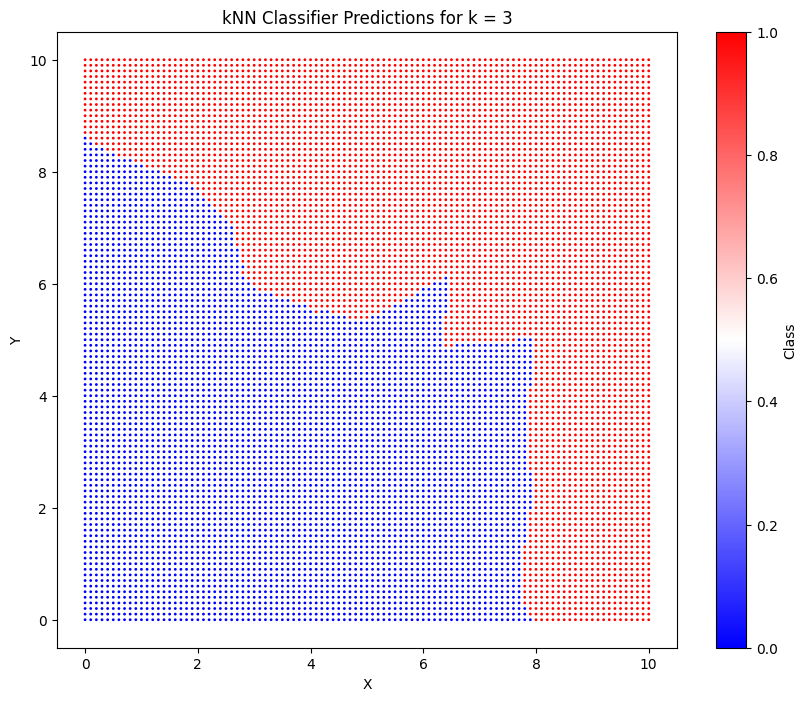

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


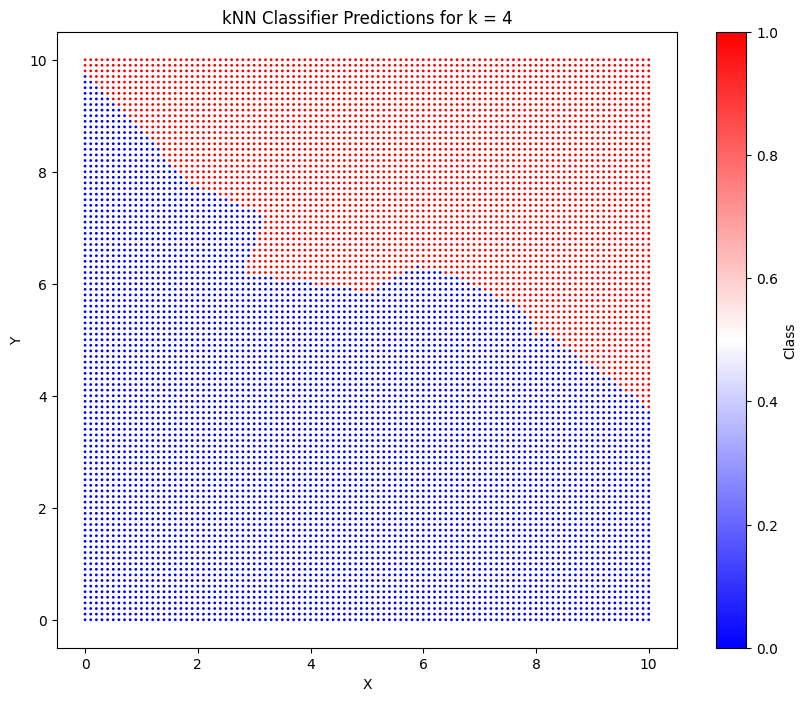

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


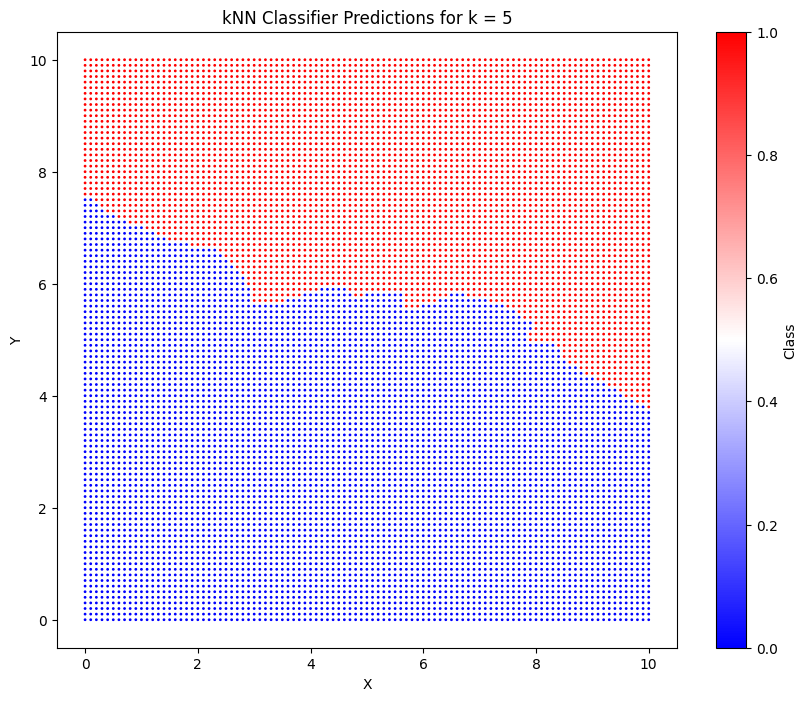

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


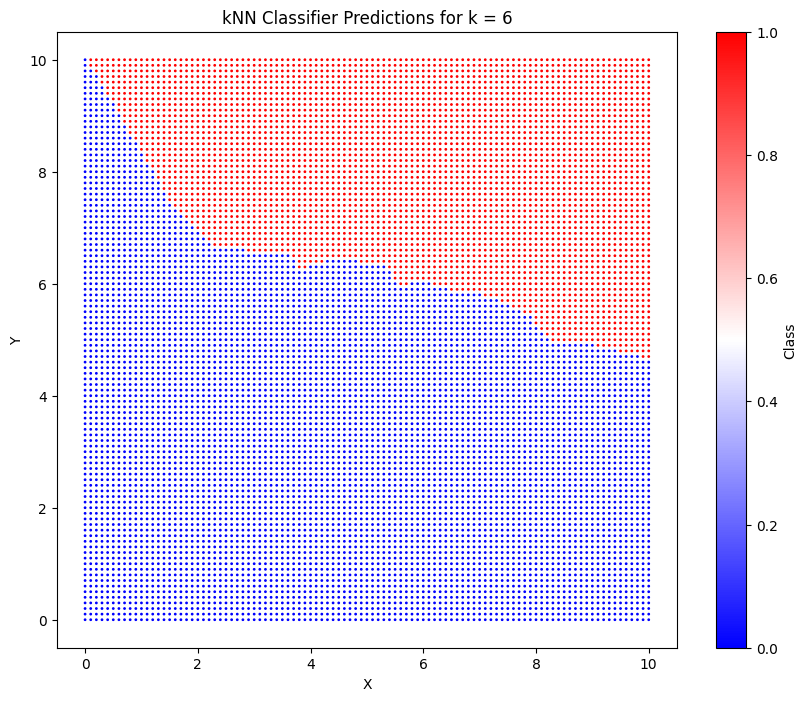

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


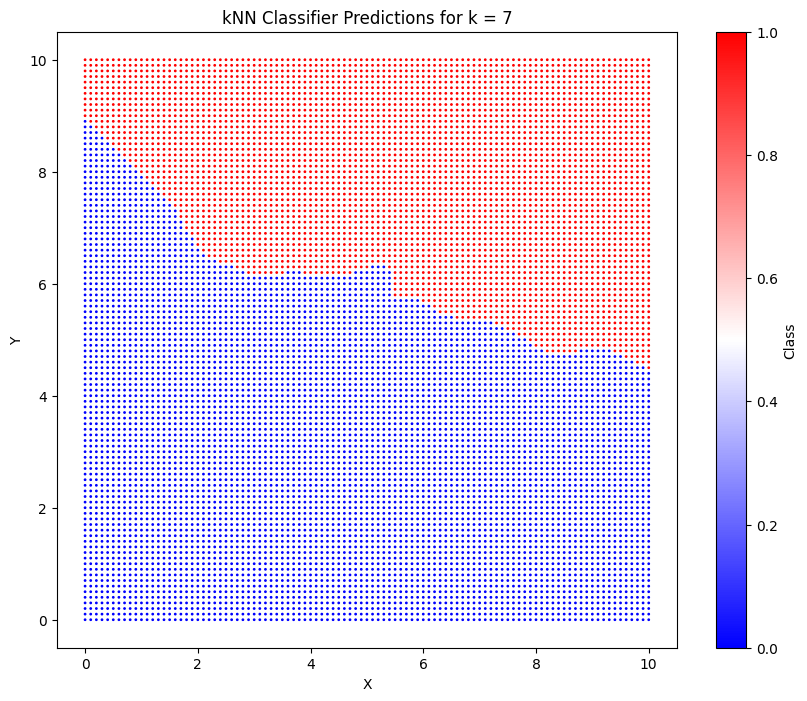

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


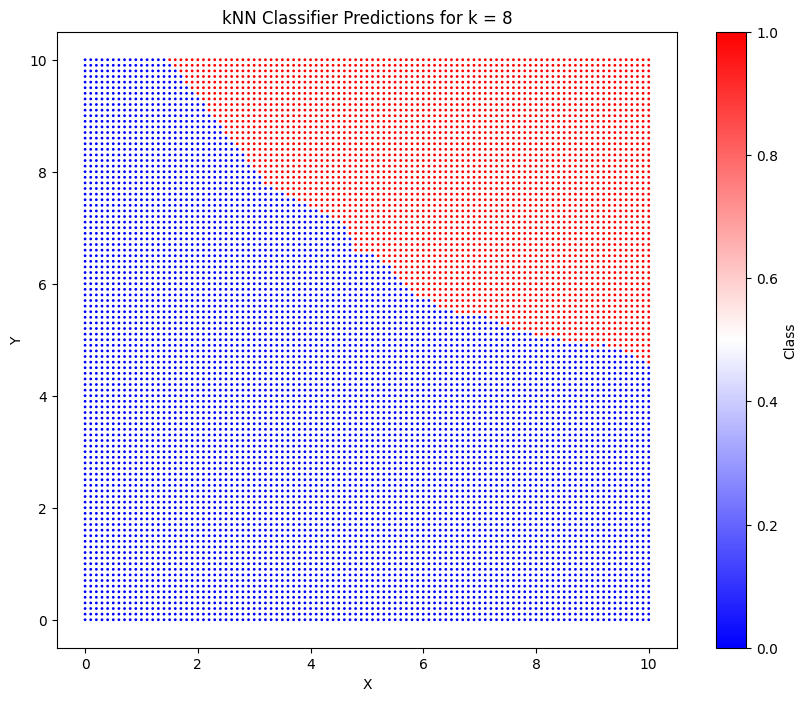

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


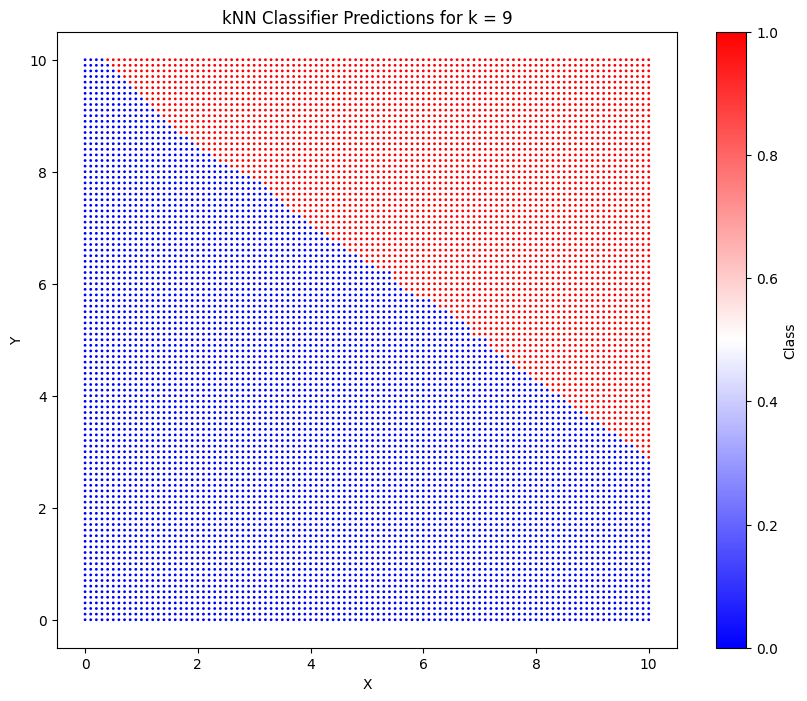

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


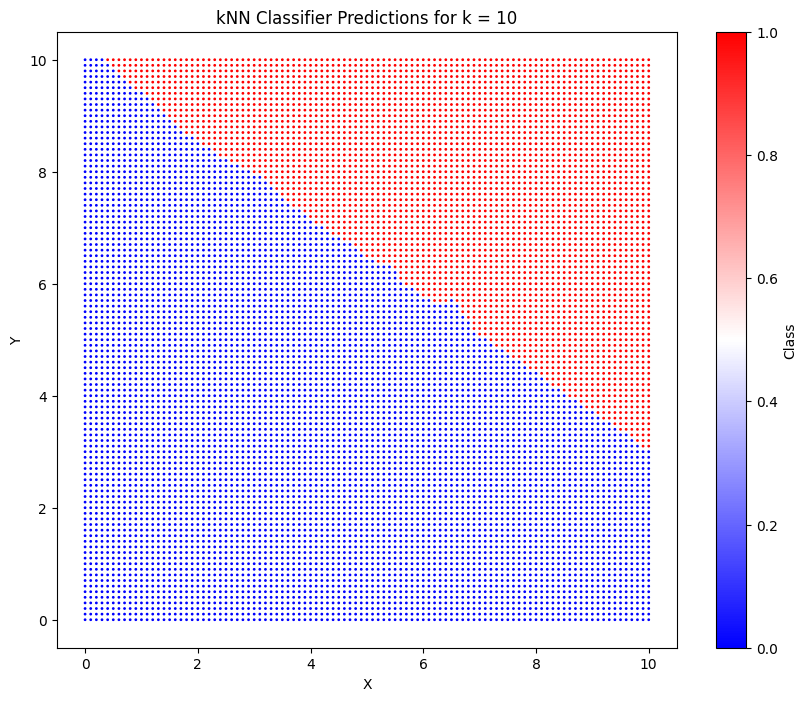

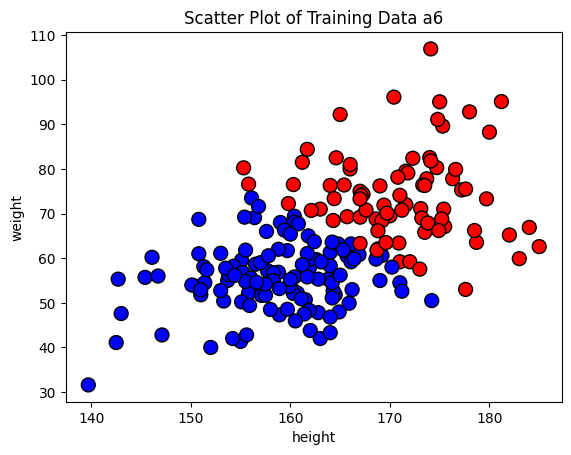

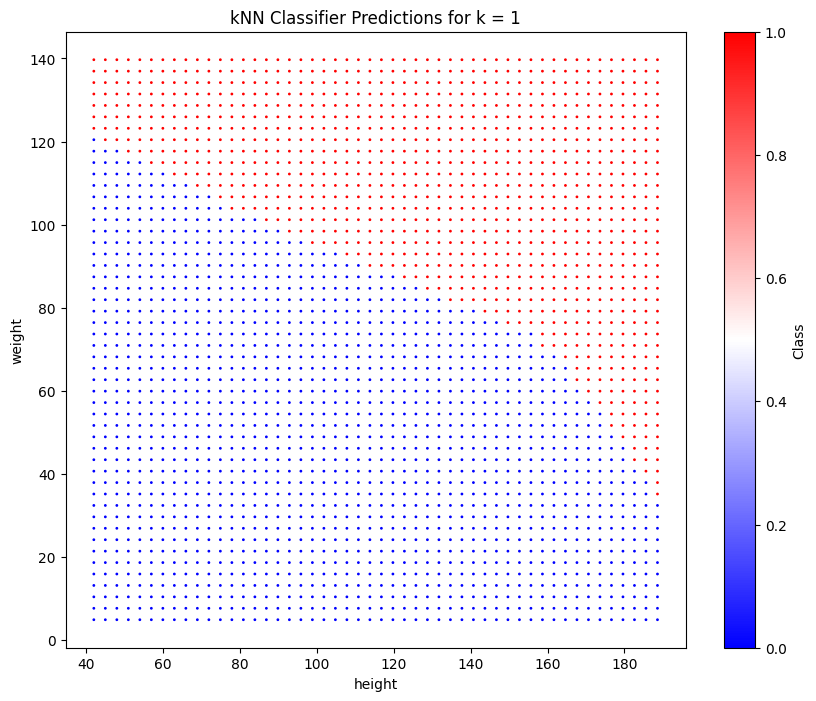

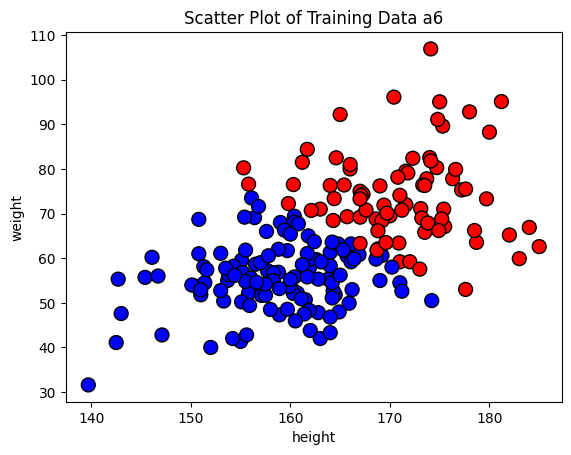

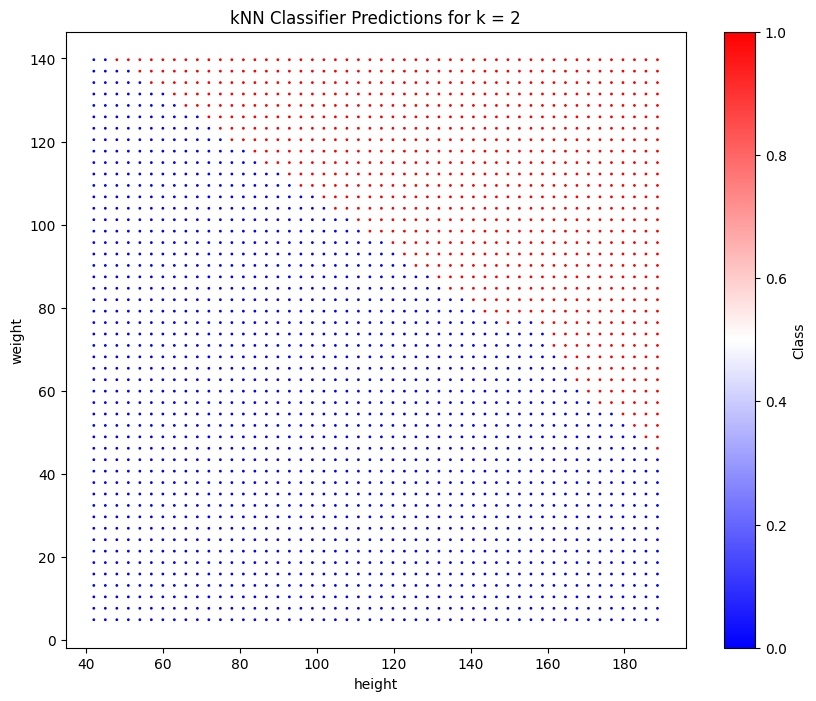

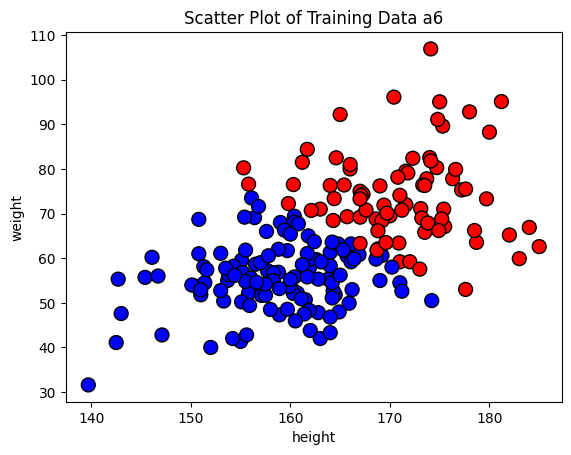

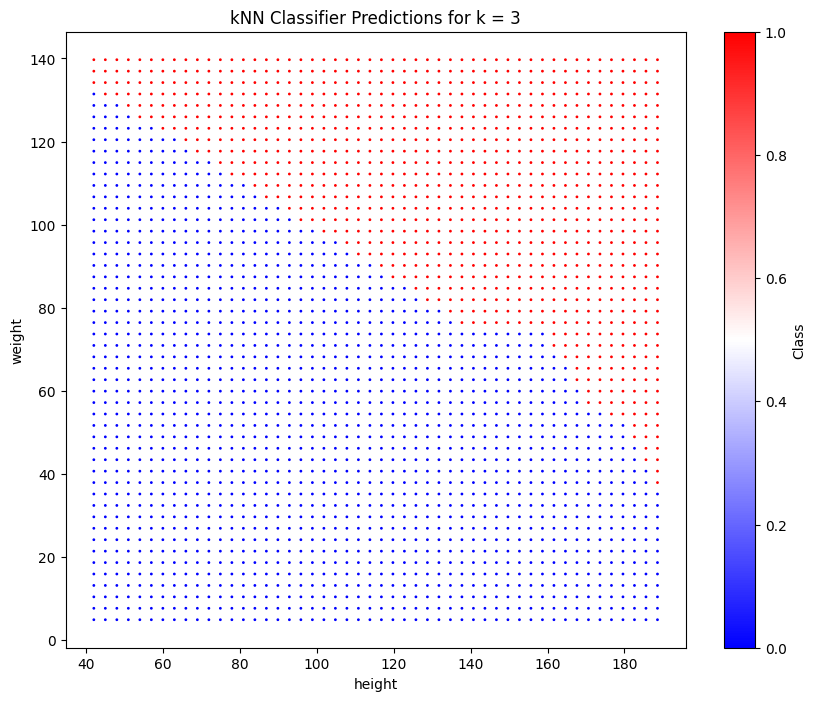

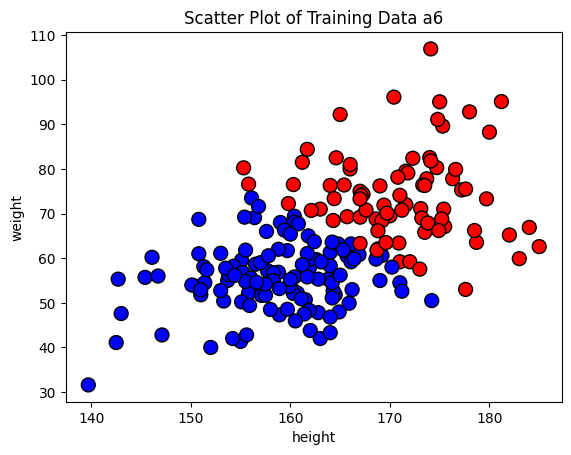

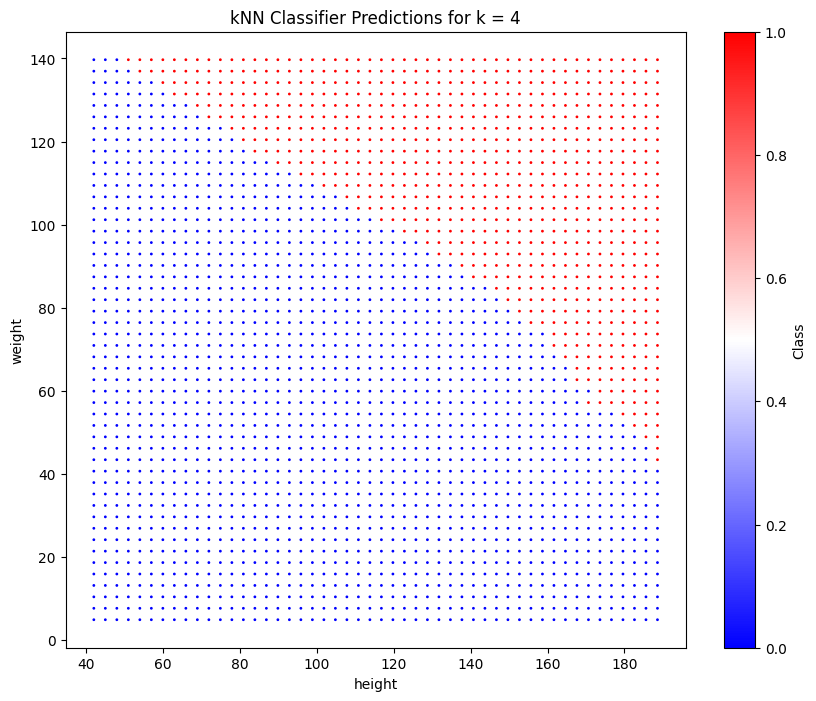

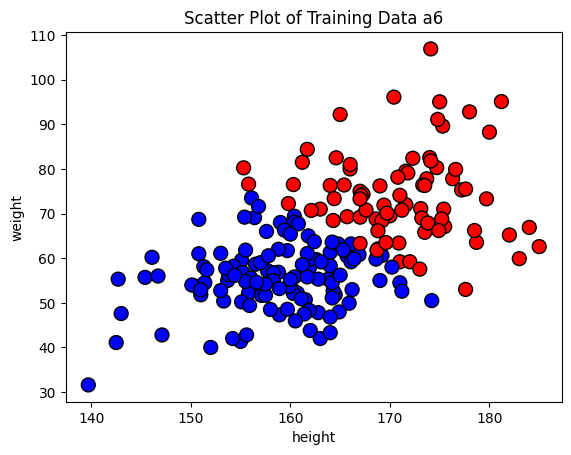

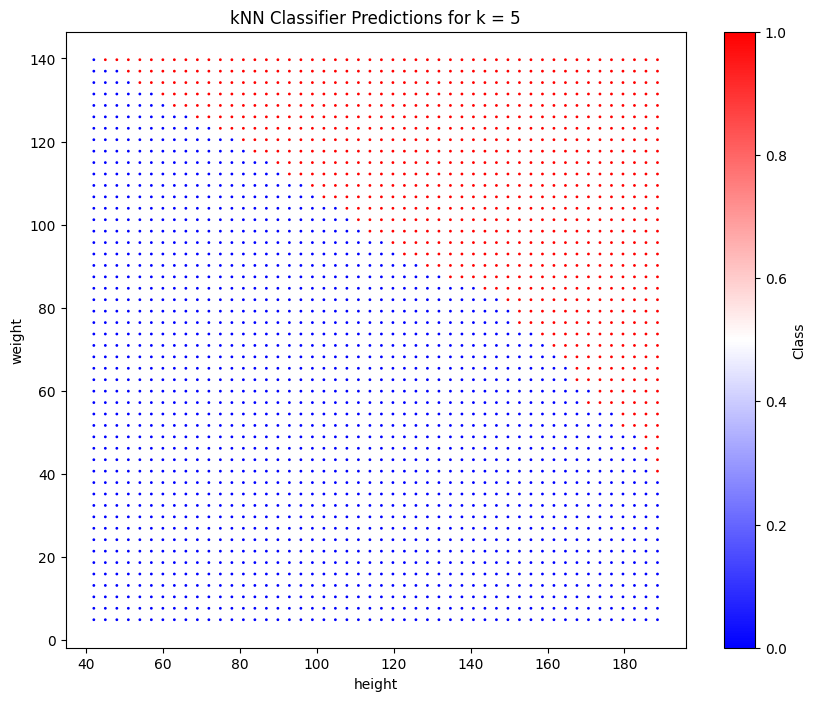

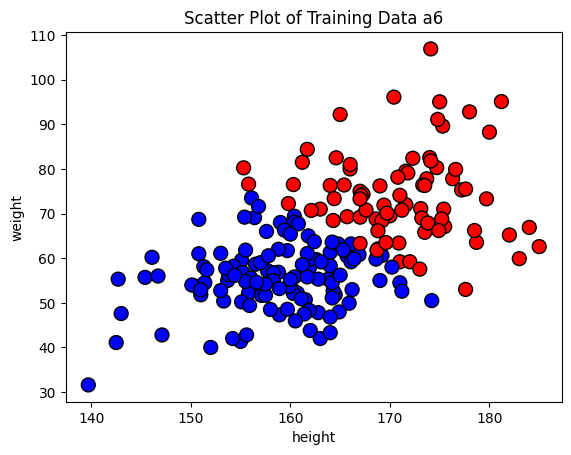

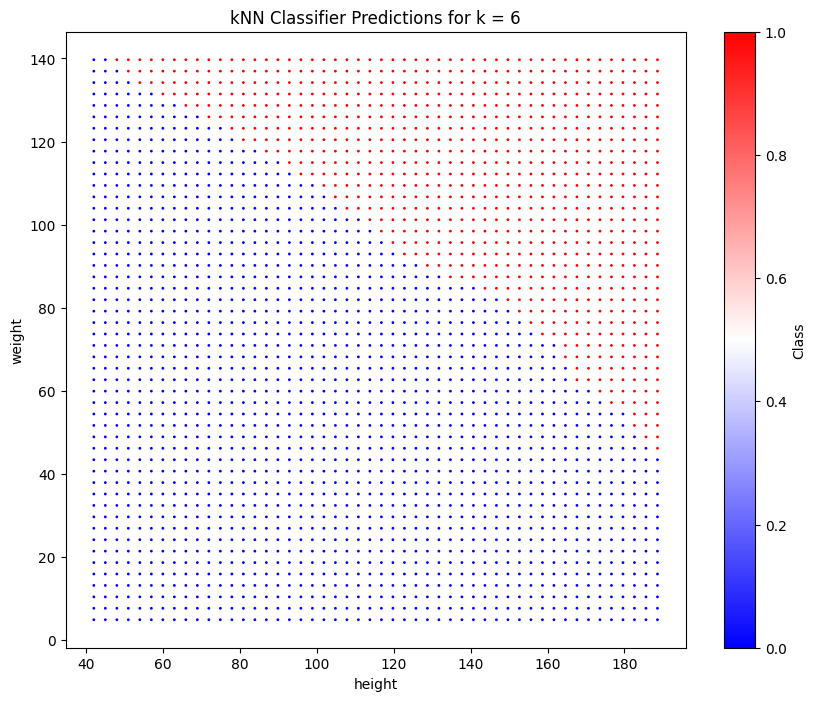

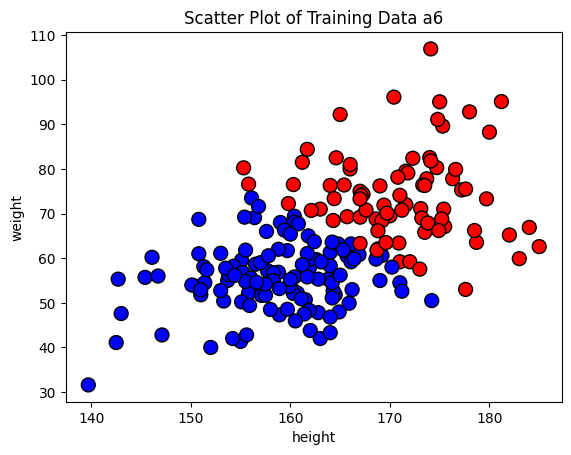

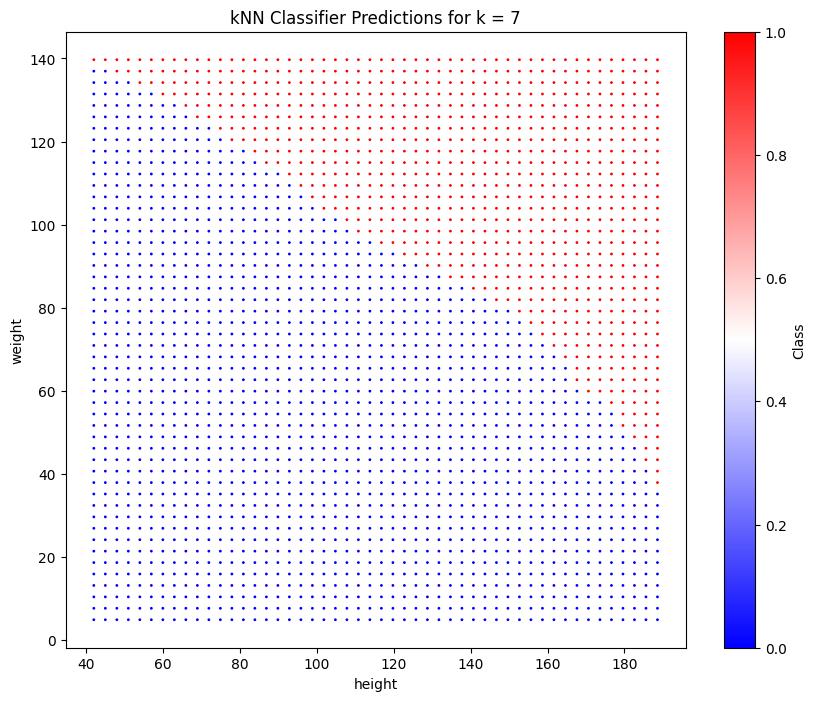

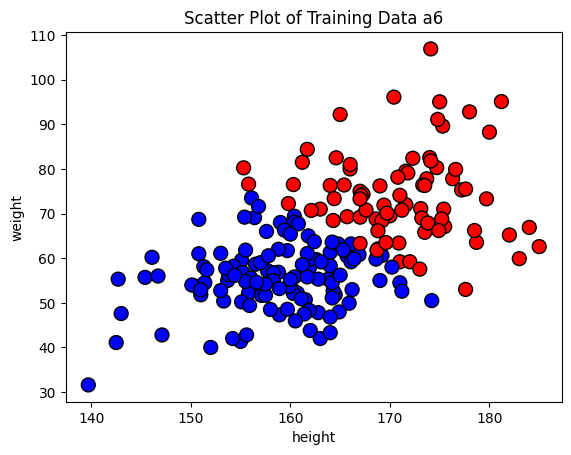

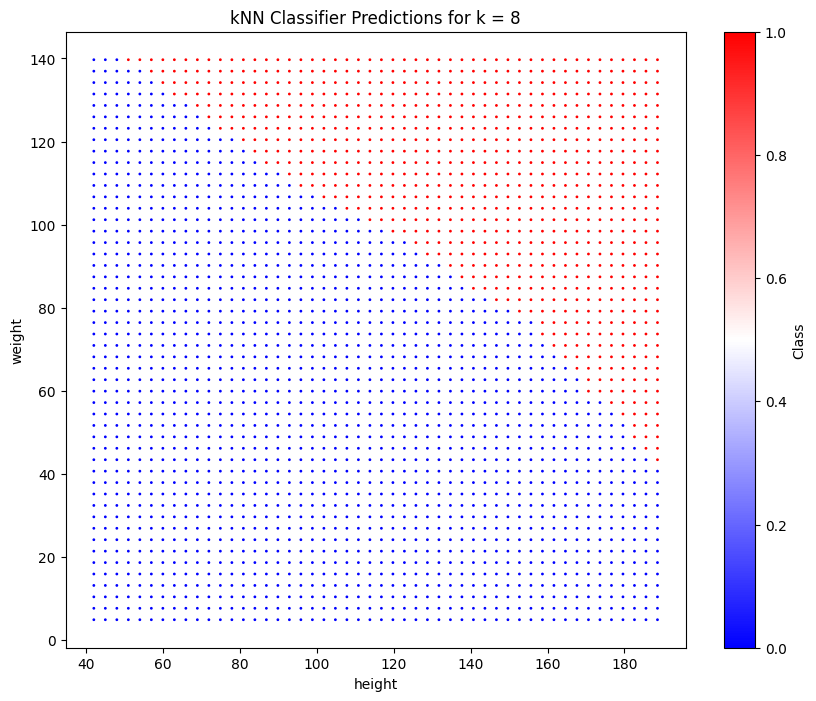

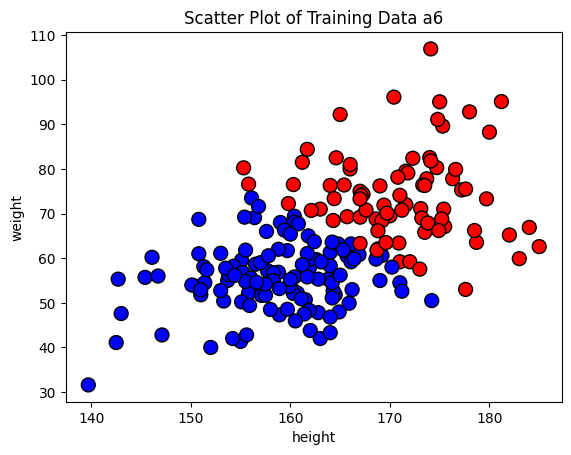

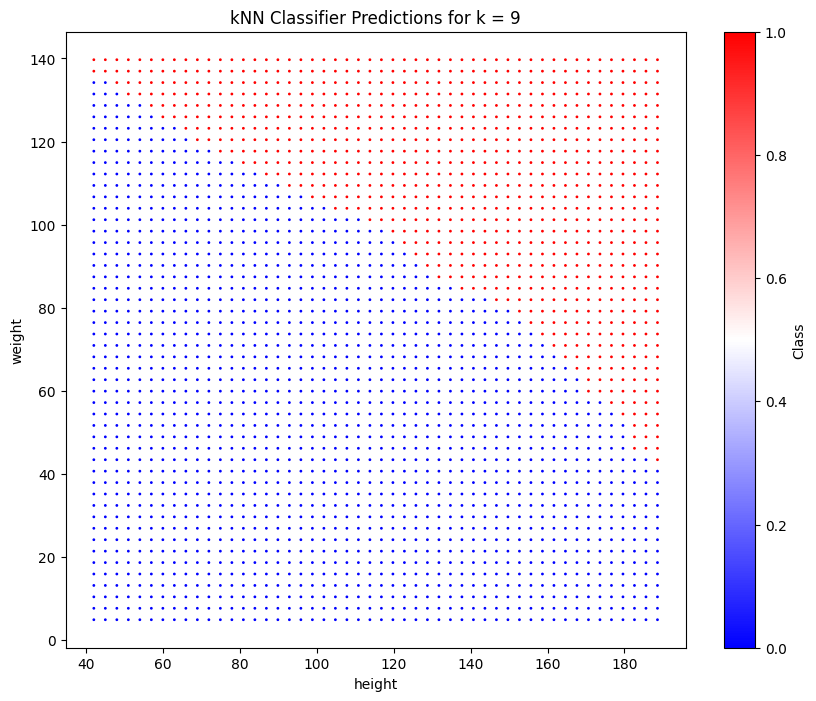

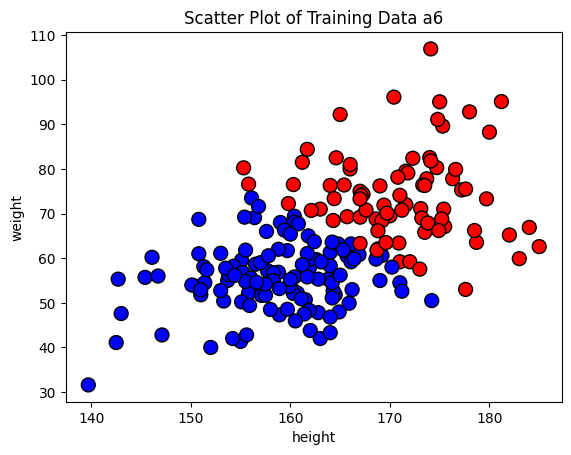

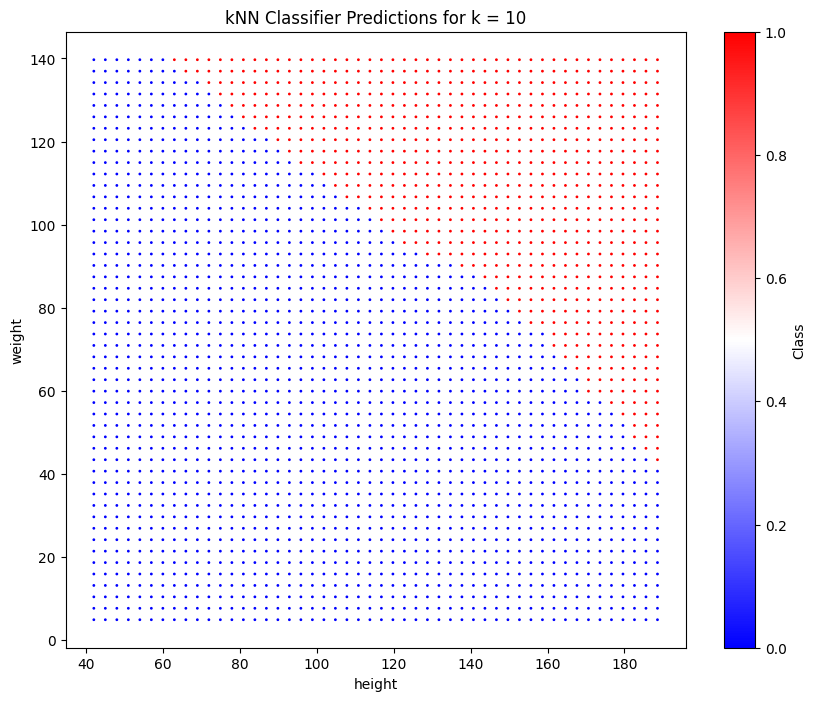

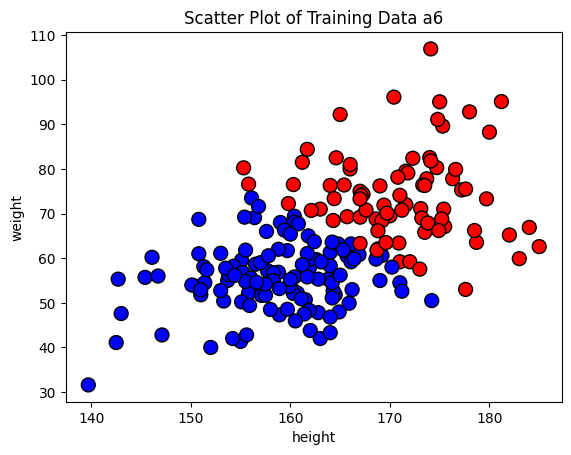

Best parameters found:  {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
Best cross-validation score: 0.97


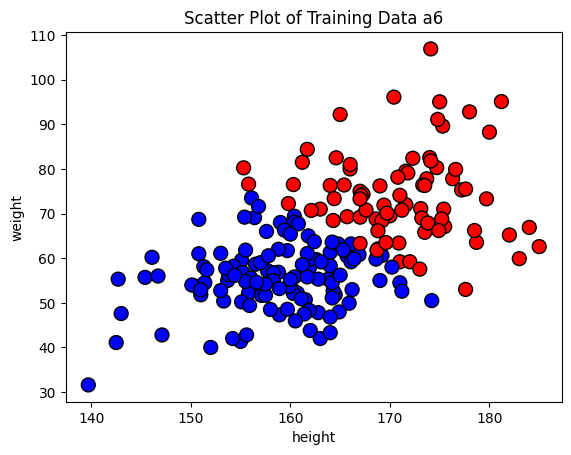

Best parameters found:  {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Best cross-validation score: 0.97


In [20]:
def main():
    # A1
    conf_matrix_train, conf_matrix_test, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test = a1()
    print("Confusion Matrix (Training):\n", conf_matrix_train)
    print("Confusion Matrix (Testing):\n", conf_matrix_test)
    print("Precision (Training):", precision_train)
    print("Recall (Training):", recall_train)
    print("F1 Score (Training):", f1_train)
    print("Precision (Testing):", precision_test)
    print("Recall (Testing):", recall_test)
    print("F1 Score (Testing):", f1_test)

    # A2
    mse, rmse, mape, r2 = a2()
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Mean Absolute Percentage Error:", mape)
    print("R2 Score:", r2)

    # A3
    training_data = a3()


    # A4
    knn_classifier(training_data, 3)
    # A5
    a5(training_data)



    # A6
    a6f()

    # A7
    a7RandomSearchCV()
    a7grid_search()

if __name__ == "__main__":
    main()